# Stock Trading with Python
## This notebook is focused on exploring and selecting our data set.

1. We first load up one of the data sets available to use and then view it via different visualization tools.
2. We can use these visualizations to gain an understanding of our data set. This will help us build the trading algorithm
down the road.

#### Instructions:
* To load a particular data set, specify its stock code in the STOCK_NAME variable. Then execute the rest of the notebook.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import mplfinance as fplt

sns.set_style('dark')

In [2]:
STOCK_NAME = 'AAPL'

df_apple = pd.read_csv(f'data_files/Stocks/{STOCK_NAME.lower()}.us.txt', index_col=0)
df_apple.index = pd.to_datetime(df_apple.index)

In [3]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8364 entries, 1984-09-07 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     8364 non-null   float64
 1   High     8364 non-null   float64
 2   Low      8364 non-null   float64
 3   Close    8364 non-null   float64
 4   Volume   8364 non-null   int64  
 5   OpenInt  8364 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 457.4 KB


<AxesSubplot:xlabel='Date'>

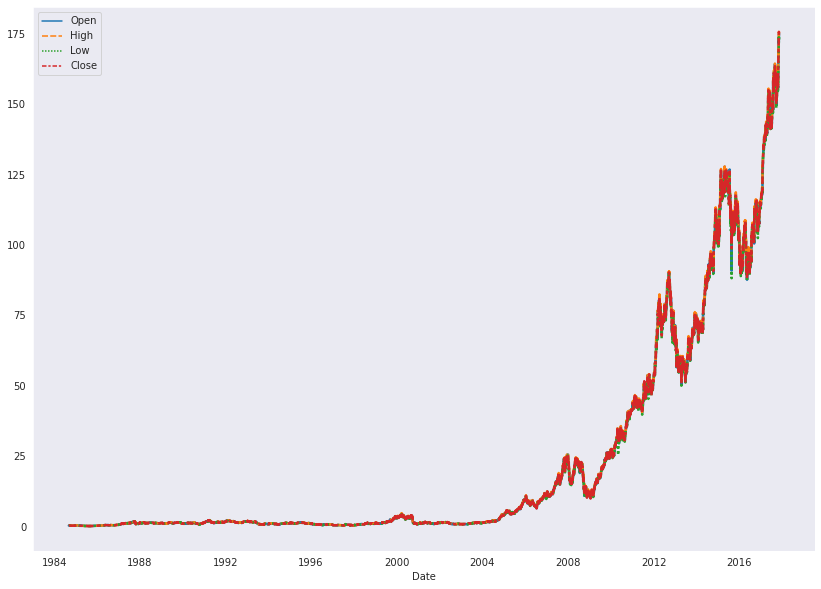

In [4]:
plt.figure(figsize=(14,10))
sns.lineplot(data=df_apple.drop(columns=['Volume', 'OpenInt']), palette='tab10', linewidth=2.5)

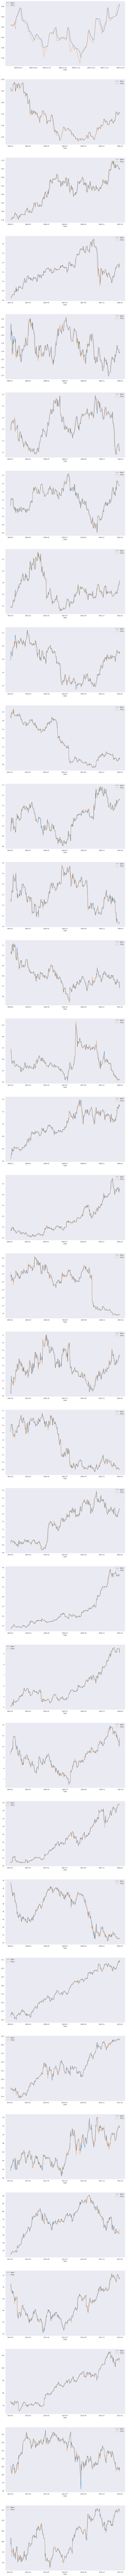

In [5]:
# year over year plots:

first_year = df_apple.index.min().year
last_year = df_apple.index.max().year
num_years = last_year - first_year

fig, axes = plt.subplots(num_years, 1, figsize=(15, 10*num_years))
# only using open and close prices here to draw a cleaner graph
for i in range(num_years):
    filter_years = (df_apple.index >= f'{first_year+i}-01-01') & (df_apple.index < f'{first_year+i+1}')
    df_ = df_apple.loc[filter_years]
    sns.lineplot(data=df_.drop(columns=['Volume', 'OpenInt', 'High','Low']), ax=axes[i])

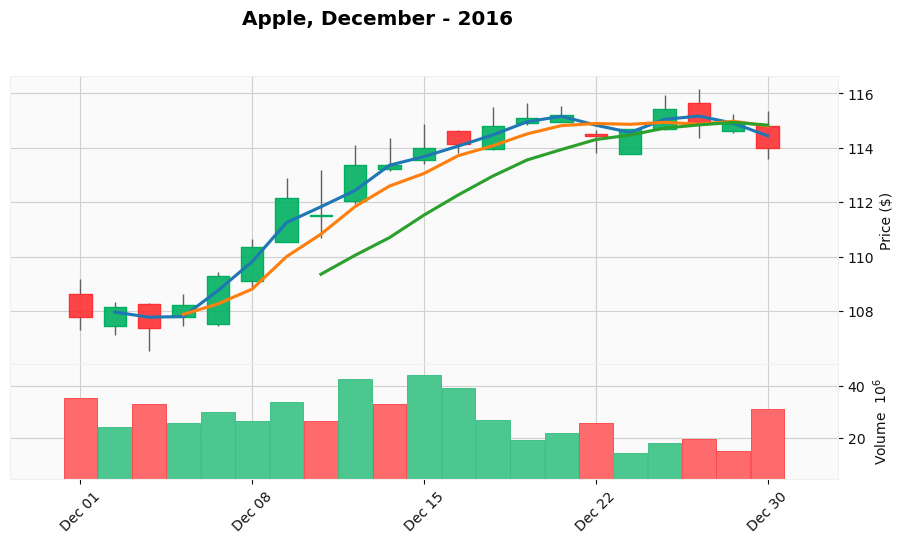

In [26]:
# Moving averages and candles!
# Lets plot for the last month of the data set:

fplt.plot(
    df_apple.loc['2016-12-01':'2016-12-31'],
    type='candle',
    title='Apple, December - 2016',
    ylabel='Price ($)',
    style = 'yahoo',
    volume = True,
    mav=(2,4,8),
    figratio=(20,10),

)

In [28]:
# create candlesticks with a slider to view specific periods:

import plotly.graph_objects as go

candlestick = go.Candlestick(
    x=df_apple.index,
    open=df_apple['Open'],
    close=df_apple['Close'],
    high=df_apple['High'],
    low=df_apple['Low']
)

fig = go.Figure(data=[candlestick])
fig.show()


In [27]:
df_apple.head()



Open     High      Low    Close    Volume  OpenInt
Date                                                             
1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0